# Visualization of COVID-19 Statistics in Ontario

# Libraries

In [1]:
library(tidyverse)
library(readr)
library(repr)
library(tidyr)
library(lubridate)
library(ggtext)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

Warning message:
"package 'readr' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




# Confirmed Cases

In [2]:
total_data = read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

head(total_data)

Rows: 7977 Columns: 40

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr   (3): prname, prnameFR, percentrecover
dbl  (36): pruid, update, numconf, numprob, numdeaths, numtotal, numtested, ...
date  (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0


In [3]:
# extracting only data for ontario
ontario_data <- total_data %>%
    select(prname, date, numconf) %>%
    filter(prname == "Ontario")

head(ontario_data)

prname,date,numconf
<chr>,<date>,<dbl>
Ontario,2020-01-31,3
Ontario,2020-02-08,3
Ontario,2020-02-16,3
Ontario,2020-02-21,3
Ontario,2020-02-24,4
Ontario,2020-02-25,4


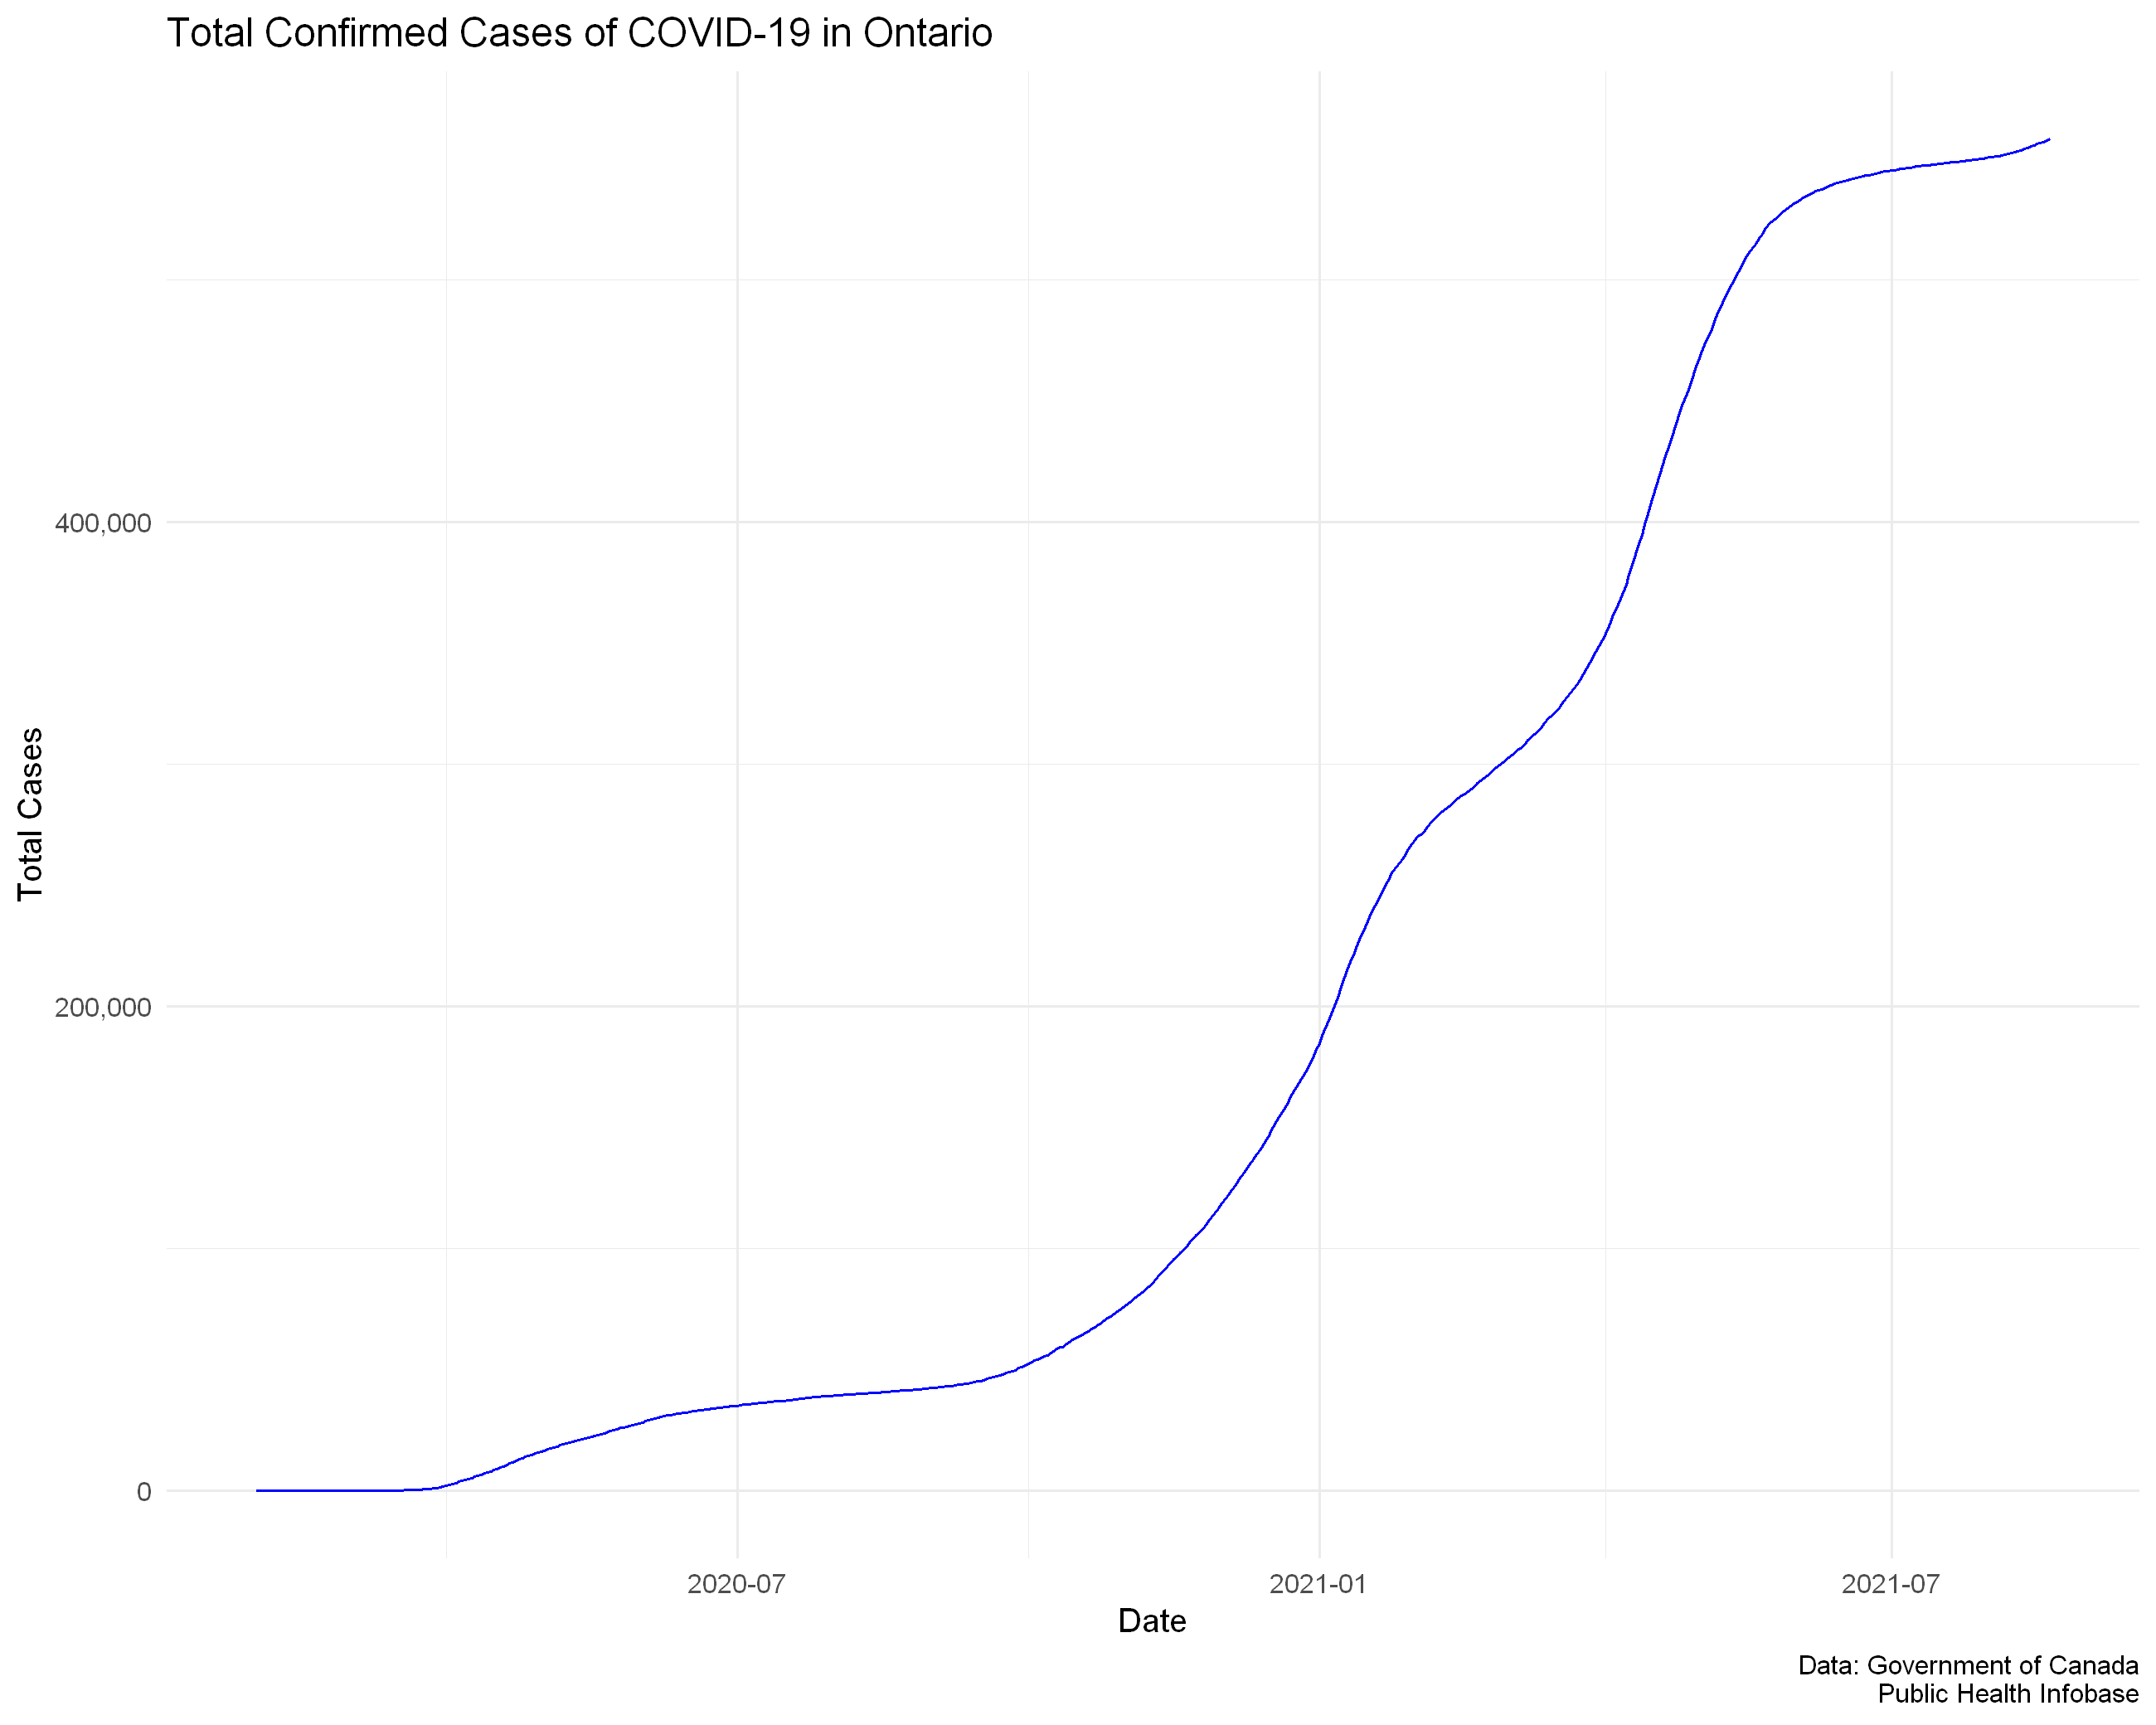

In [4]:
# plotting
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

ggplot(ontario_data, mapping = aes(x = date, y = numconf)) + 
    geom_line(color='blue') + 
    scale_y_continuous(labels = scales::comma) + 
    labs(title='Total Confirmed Cases of COVID-19 in Ontario', x='Date', 
         y='Total Cases', caption='Data: Government of Canada\nPublic Health Infobase') + 
    theme_minimal()

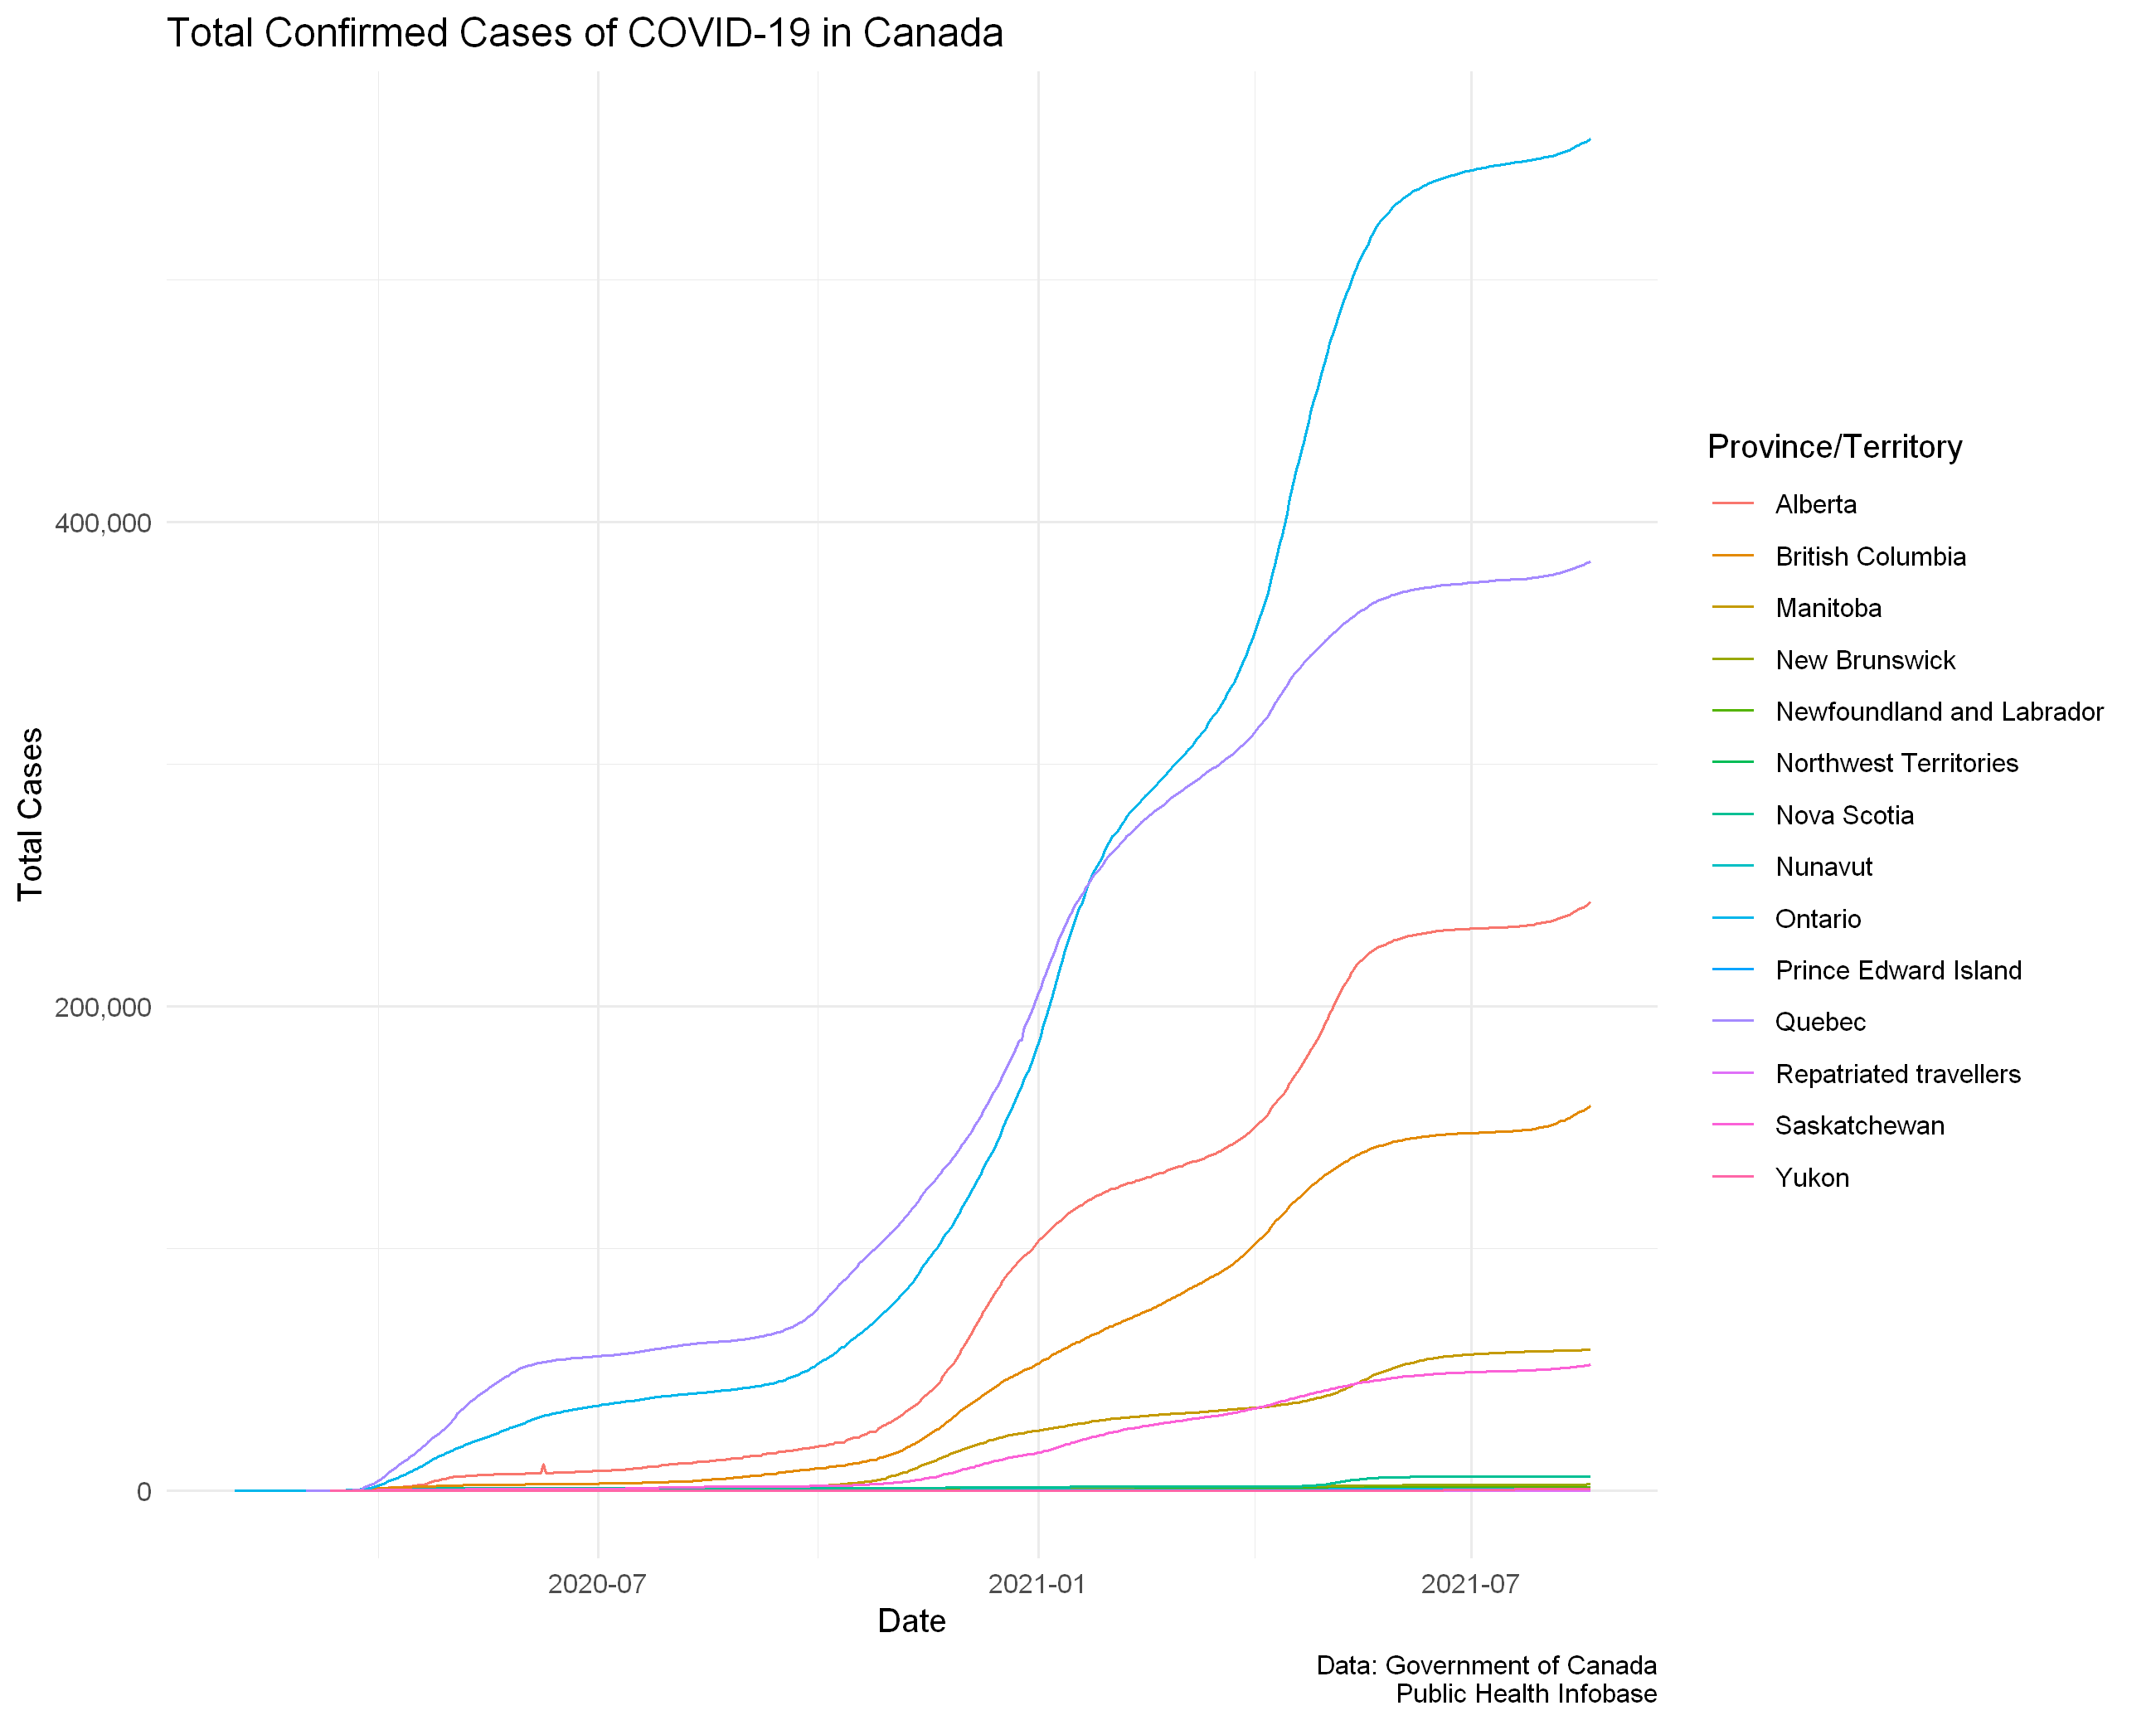

In [5]:
# extracting data on all provinces/territories
province_data <- total_data %>%
    select(prname, date, numconf) %>%
    filter(prname != 'Repatriated Travellers', prname != 'Canada')

# plotting
ggplot(province_data, mapping = aes(x = date, y = numconf, color = prname)) + 
    geom_line() +
    scale_y_continuous(labels = scales::comma) + 
    labs(title='Total Confirmed Cases of COVID-19 in Canada', x='Date', 
         y='Total Cases', caption='Data: Government of Canada\nPublic Health Infobase',
         color='Province/Territory') + 
    theme_minimal()

# Individuals in Hospitals

In [6]:
# hospital data
ontario_data2_raw = read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')

Rows: 565 Columns: 27

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (26): Confirmed Negative, Presumptive Negative, Presumptive Positive, C...
date  (1): Reported Date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [7]:
# putting data into tidy format
ontario_data2 <- ontario_data2_raw %>%
    select('Reported Date',
           'Number of patients hospitalized with COVID-19',
           'Number of patients in ICU due to COVID-19',
           'Number of patients in ICU on a ventilator due to COVID-19') %>%
    rename(date = 'Reported Date',
           'In Hospital' = 'Number of patients hospitalized with COVID-19',
           'In ICU' = 'Number of patients in ICU due to COVID-19',
           'In ICU on Ventilator' = 'Number of patients in ICU on a ventilator due to COVID-19') %>%
    pivot_longer(-date, names_to = 'patient_type', values_to = 'count') %>%
    drop_na()

# checking formatting
head(ontario_data2)

date,patient_type,count
<date>,<chr>,<dbl>
2020-04-02,In Hospital,405
2020-04-03,In Hospital,462
2020-04-04,In Hospital,506
2020-04-05,In Hospital,523
2020-04-06,In Hospital,589
2020-04-07,In Hospital,614


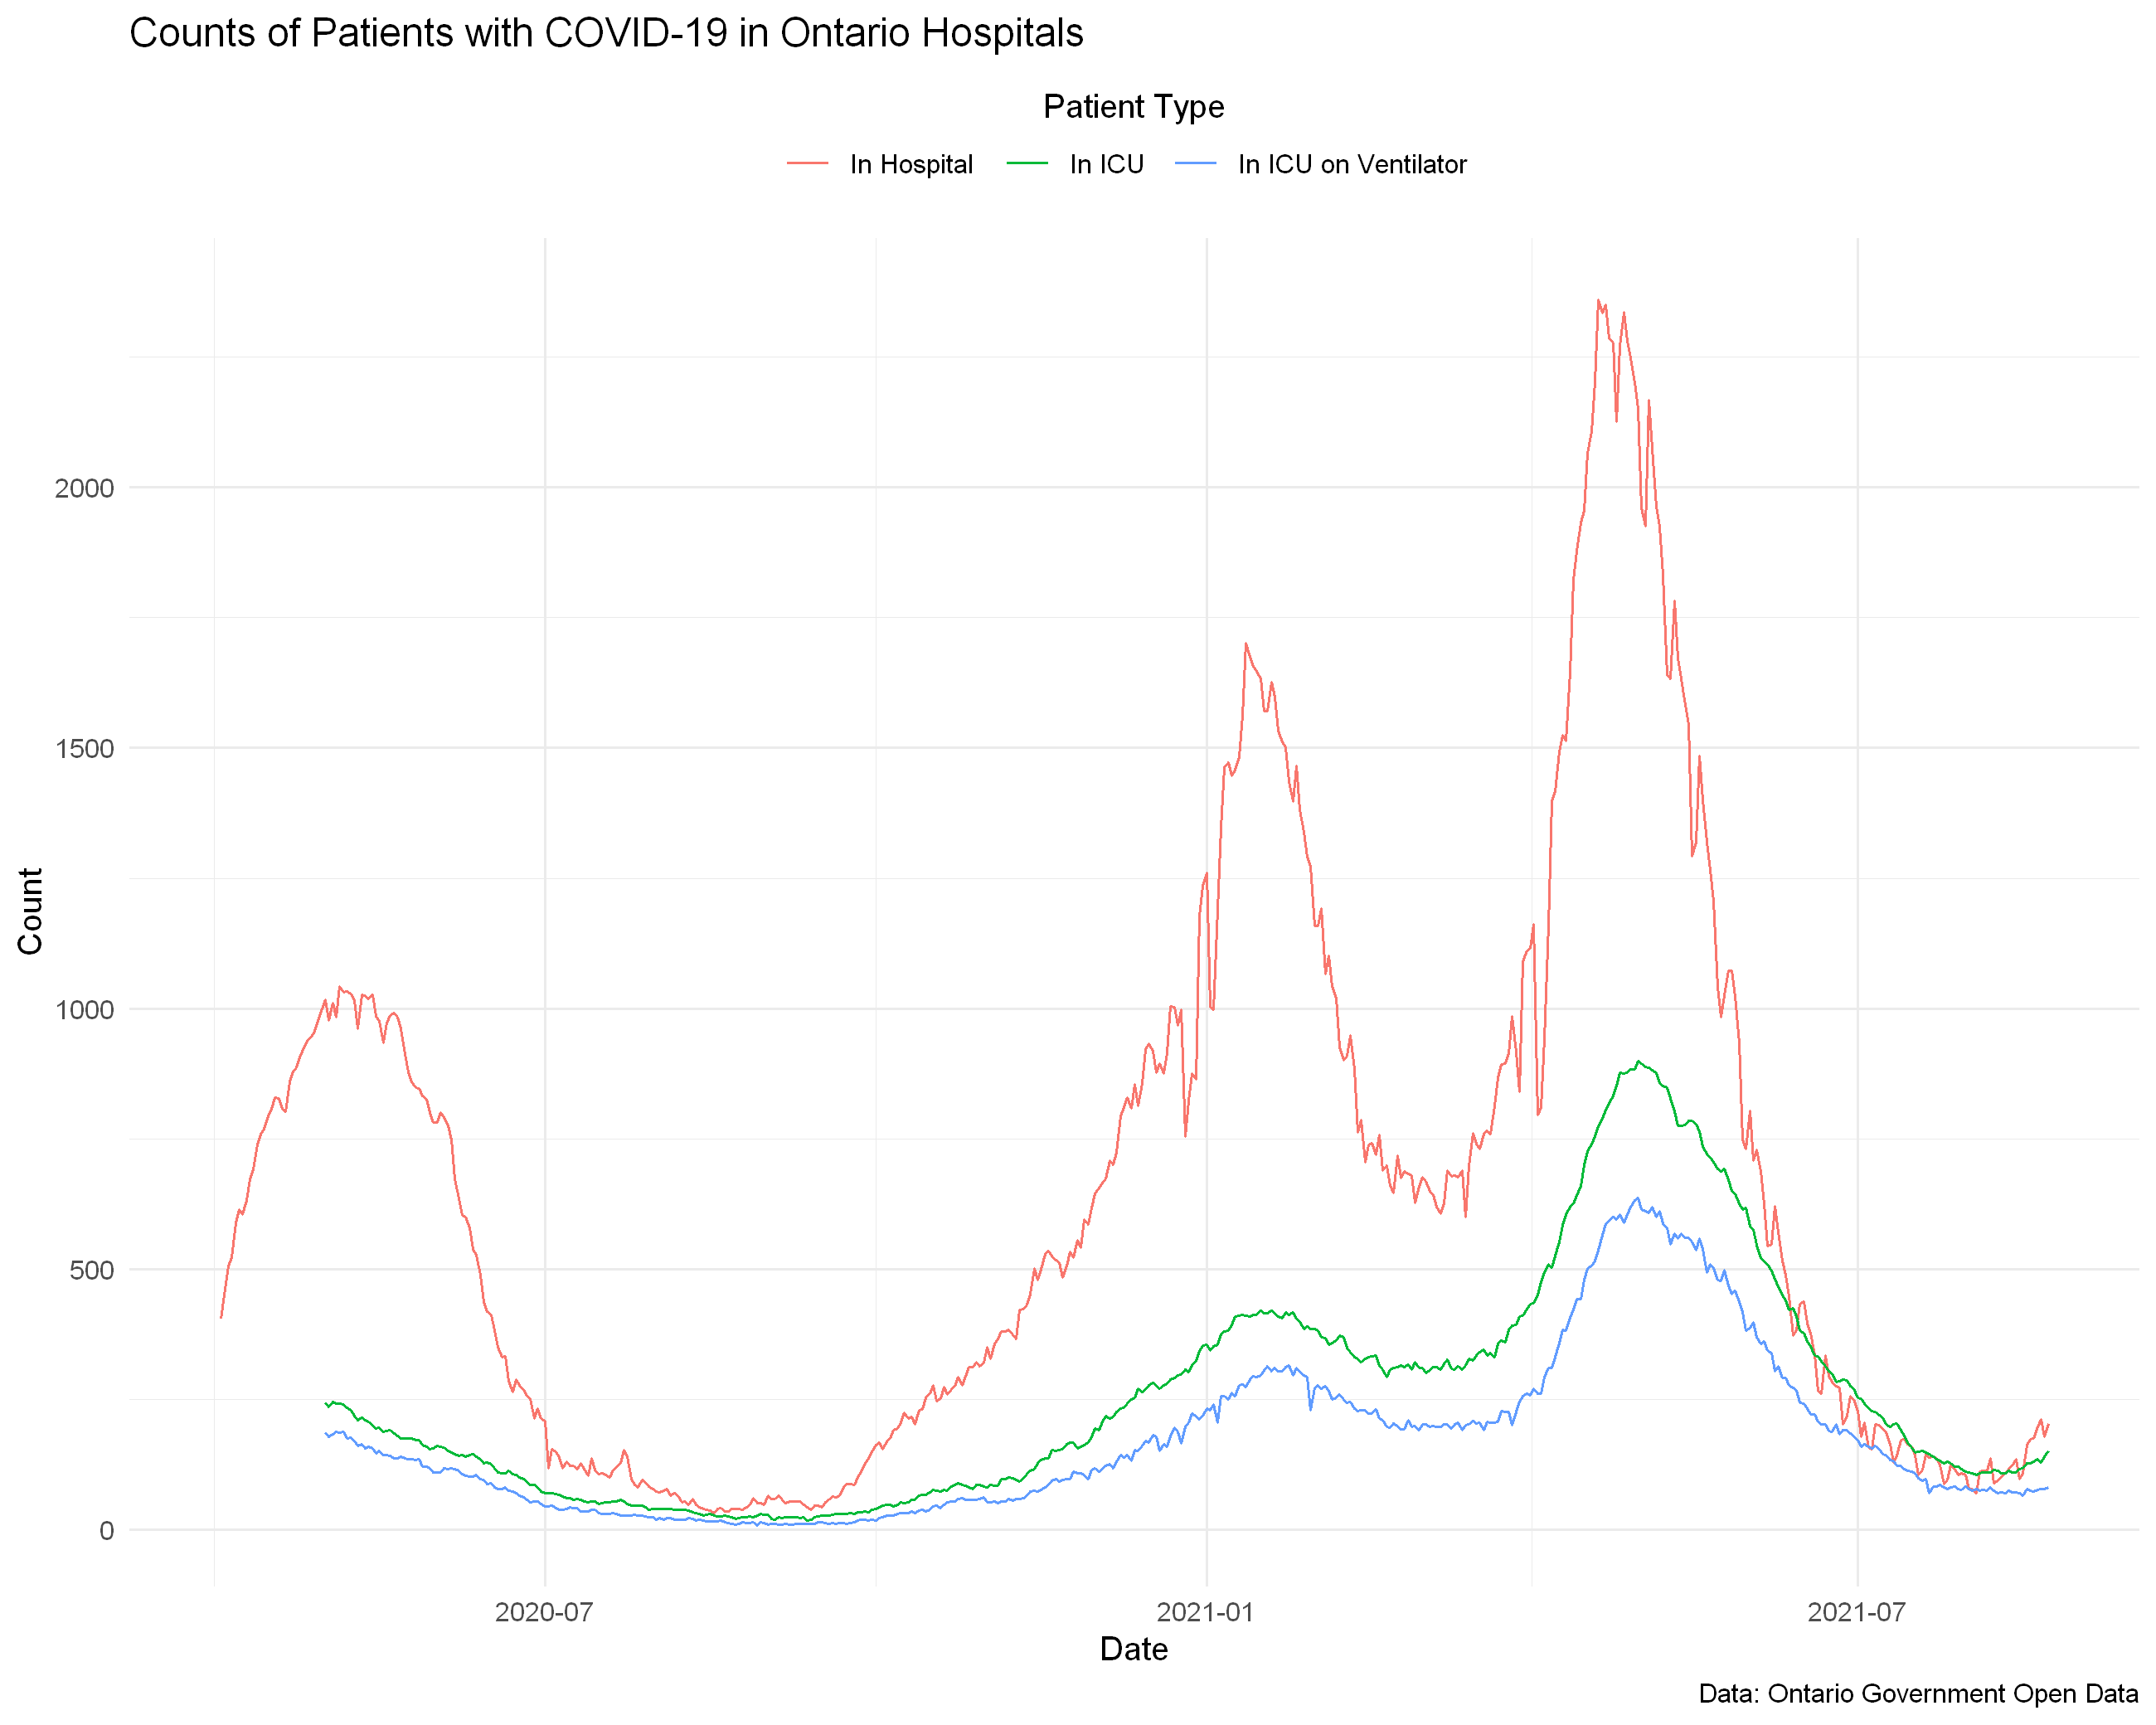

In [8]:
# plotting
ggplot(ontario_data2, aes(x = date, y = count, color = patient_type)) + 
    geom_line() + 
    labs(title = 'Counts of Patients with COVID-19 in Ontario Hospitals', 
         caption = 'Data: Ontario Government Open Data', 
         x = 'Date', 
         y = 'Count',
         color = 'Patient Type') + 
    theme_minimal() + 
    theme(legend.position = 'top') +
    guides(color = guide_legend(title.position = 'top', title.hjust = 0.5))

# Vaccine Data

In [9]:
# vaccine data
vaccine_data_raw <- read_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv')

head(vaccine_data_raw)

Rows: 238 Columns: 8

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (7): previous_day_total_doses_administered, previous_day_at_least_one, ...
date (1): report_date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



report_date,previous_day_total_doses_administered,previous_day_at_least_one,previous_day_fully_vaccinated,total_doses_administered,total_individuals_at_least_one,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-24,NA,NA,NA,10756,NA,NA,NA
2020-12-30,7847,NA,NA,18603,NA,NA,NA
2020-12-31,4899,NA,NA,23502,NA,NA,NA
2021-01-01,5385,NA,NA,28887,NA,NA,NA
2021-01-02,4304,NA,NA,33191,NA,NA,NA
2021-01-03,4360,NA,NA,37551,NA,NA,NA


In [10]:
# putting data into tidy format
# https://worldpopulationreview.com/canadian-provinces/ontario-population
ontario_population <- 14733119

vaccine_data <- vaccine_data_raw %>%
    mutate(total_individuals_partially_vaccinated = total_individuals_at_least_one - total_individuals_fully_vaccinated) %>%
    mutate(total_individuals_unvaccinated = ontario_population - total_individuals_at_least_one) %>%
    rename('Fully Vaccinated' = total_individuals_fully_vaccinated, 
           'Partially Vaccinated' = total_individuals_partially_vaccinated,
           'Unvaccinated' = total_individuals_unvaccinated) %>%
    pivot_longer(-report_date, names_to = 'metric', values_to = 'count')

head(vaccine_data)

report_date,metric,count
<date>,<chr>,<dbl>
2020-12-24,previous_day_total_doses_administered,NA
2020-12-24,previous_day_at_least_one,NA
2020-12-24,previous_day_fully_vaccinated,NA
2020-12-24,total_doses_administered,10756
2020-12-24,total_individuals_at_least_one,NA
2020-12-24,total_doses_in_fully_vaccinated_individuals,NA


Warning message:
"Removed 24 row(s) containing missing values (geom_path)."


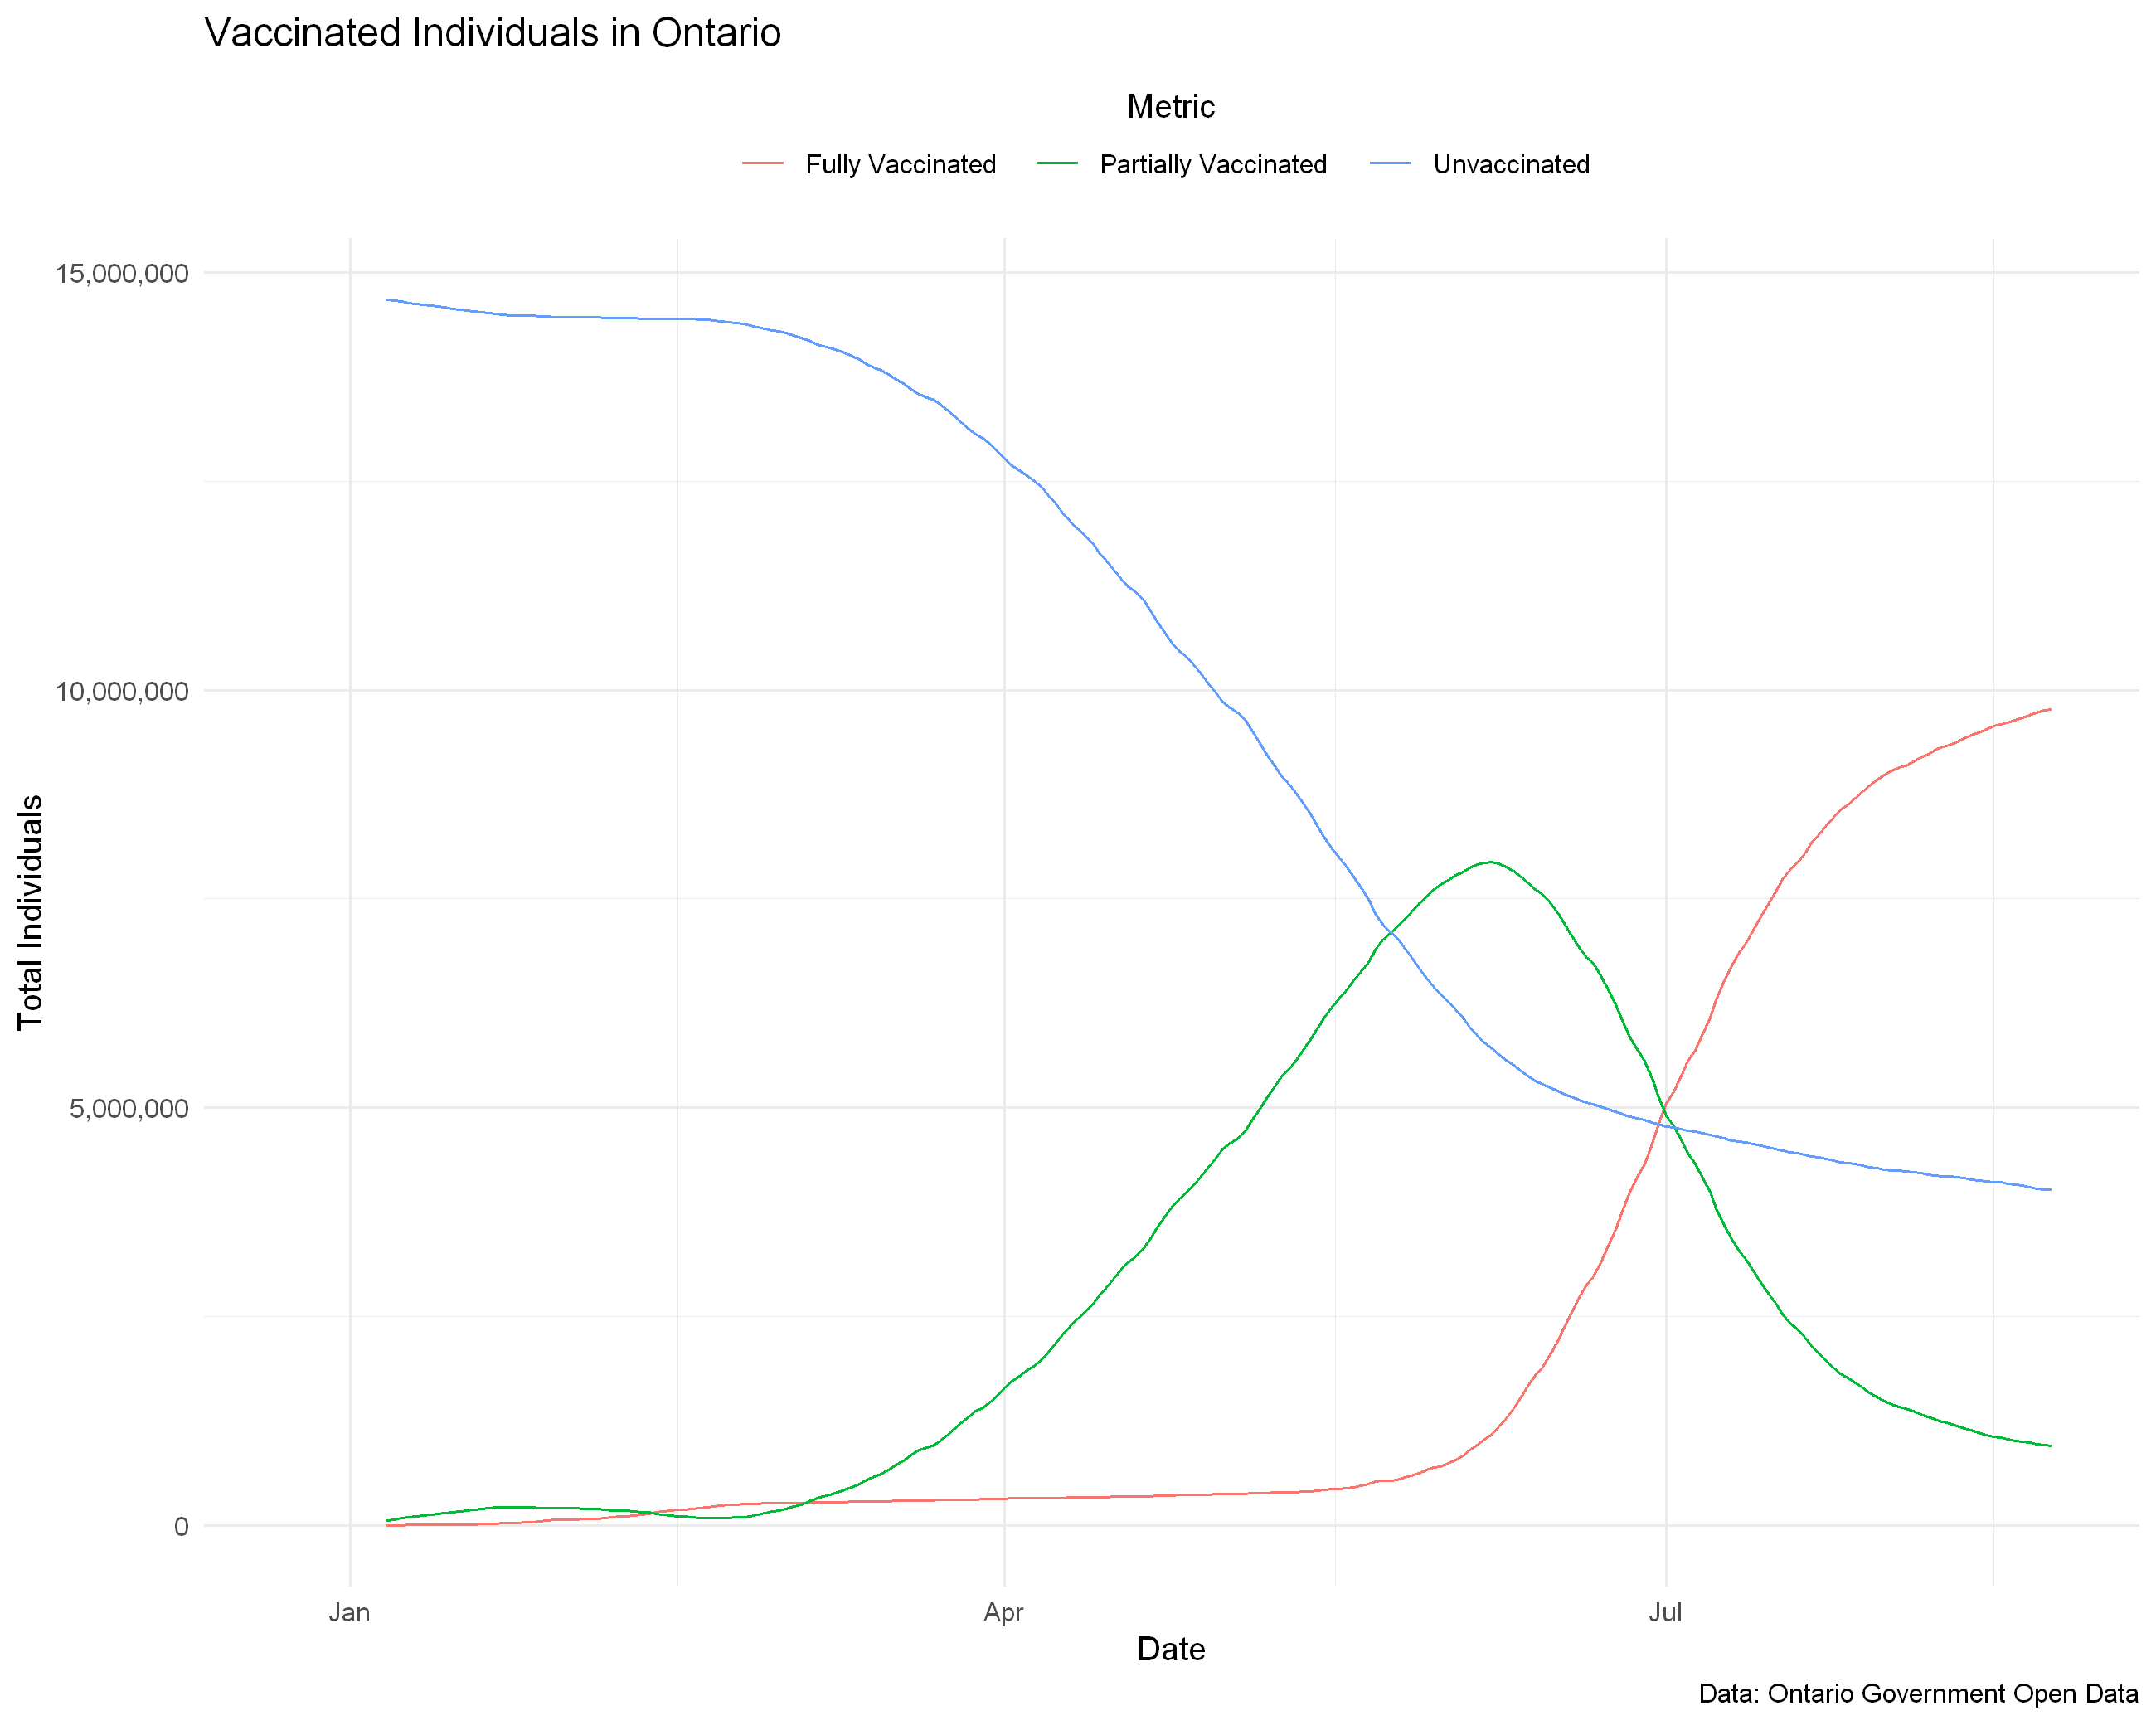

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

vaccine_data %>%
    filter(metric %in% c('Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated')) %>%
    ggplot(aes(x = report_date, y = count, color = metric)) + 
        geom_line() + 
        scale_y_continuous(labels = scales::comma) + 
        labs(title = 'Vaccinated Individuals in Ontario', 
               caption = 'Data: Ontario Government Open Data',
               x = 'Date',
               y = 'Total Individuals',
               color = 'Metric') + 
        theme_minimal() + 
        theme(legend.position = 'top') +
        guides(color = guide_legend(title.position = 'top', title.hjust = 0.5))

# Cases by Vaccination Status

In [12]:
cases_vac_status <- read_csv("https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/eed63cf2-83dd-4598-b337-b288c0a89a16/download/cases_by_vac_status.csv")

head(cases_vac_status)

Rows: 15 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (4): covid19_cases_unvac, covid19_cases_partial_vac, covid19_cases_full...
date (1): Date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Date,covid19_cases_unvac,covid19_cases_partial_vac,covid19_cases_full_vac,covid19_cases_vac_unknown
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2021-08-09,286,53,82,NA
2021-08-10,229,25,63,NA
2021-08-11,234,32,58,NA
2021-08-12,360,56,88,NA
2021-08-13,368,57,85,NA
2021-08-14,408,59,111,NA


In [13]:
cases_vac_status_tidy <- cases_vac_status %>%
    select(-covid19_cases_vac_unknown) %>%
    pivot_longer(-Date, names_to = 'metric', values_to = 'count')

head(cases_vac_status_tidy)

Date,metric,count
<date>,<chr>,<dbl>
2021-08-09,covid19_cases_unvac,286
2021-08-09,covid19_cases_partial_vac,53
2021-08-09,covid19_cases_full_vac,82
2021-08-10,covid19_cases_unvac,229
2021-08-10,covid19_cases_partial_vac,25
2021-08-10,covid19_cases_full_vac,63


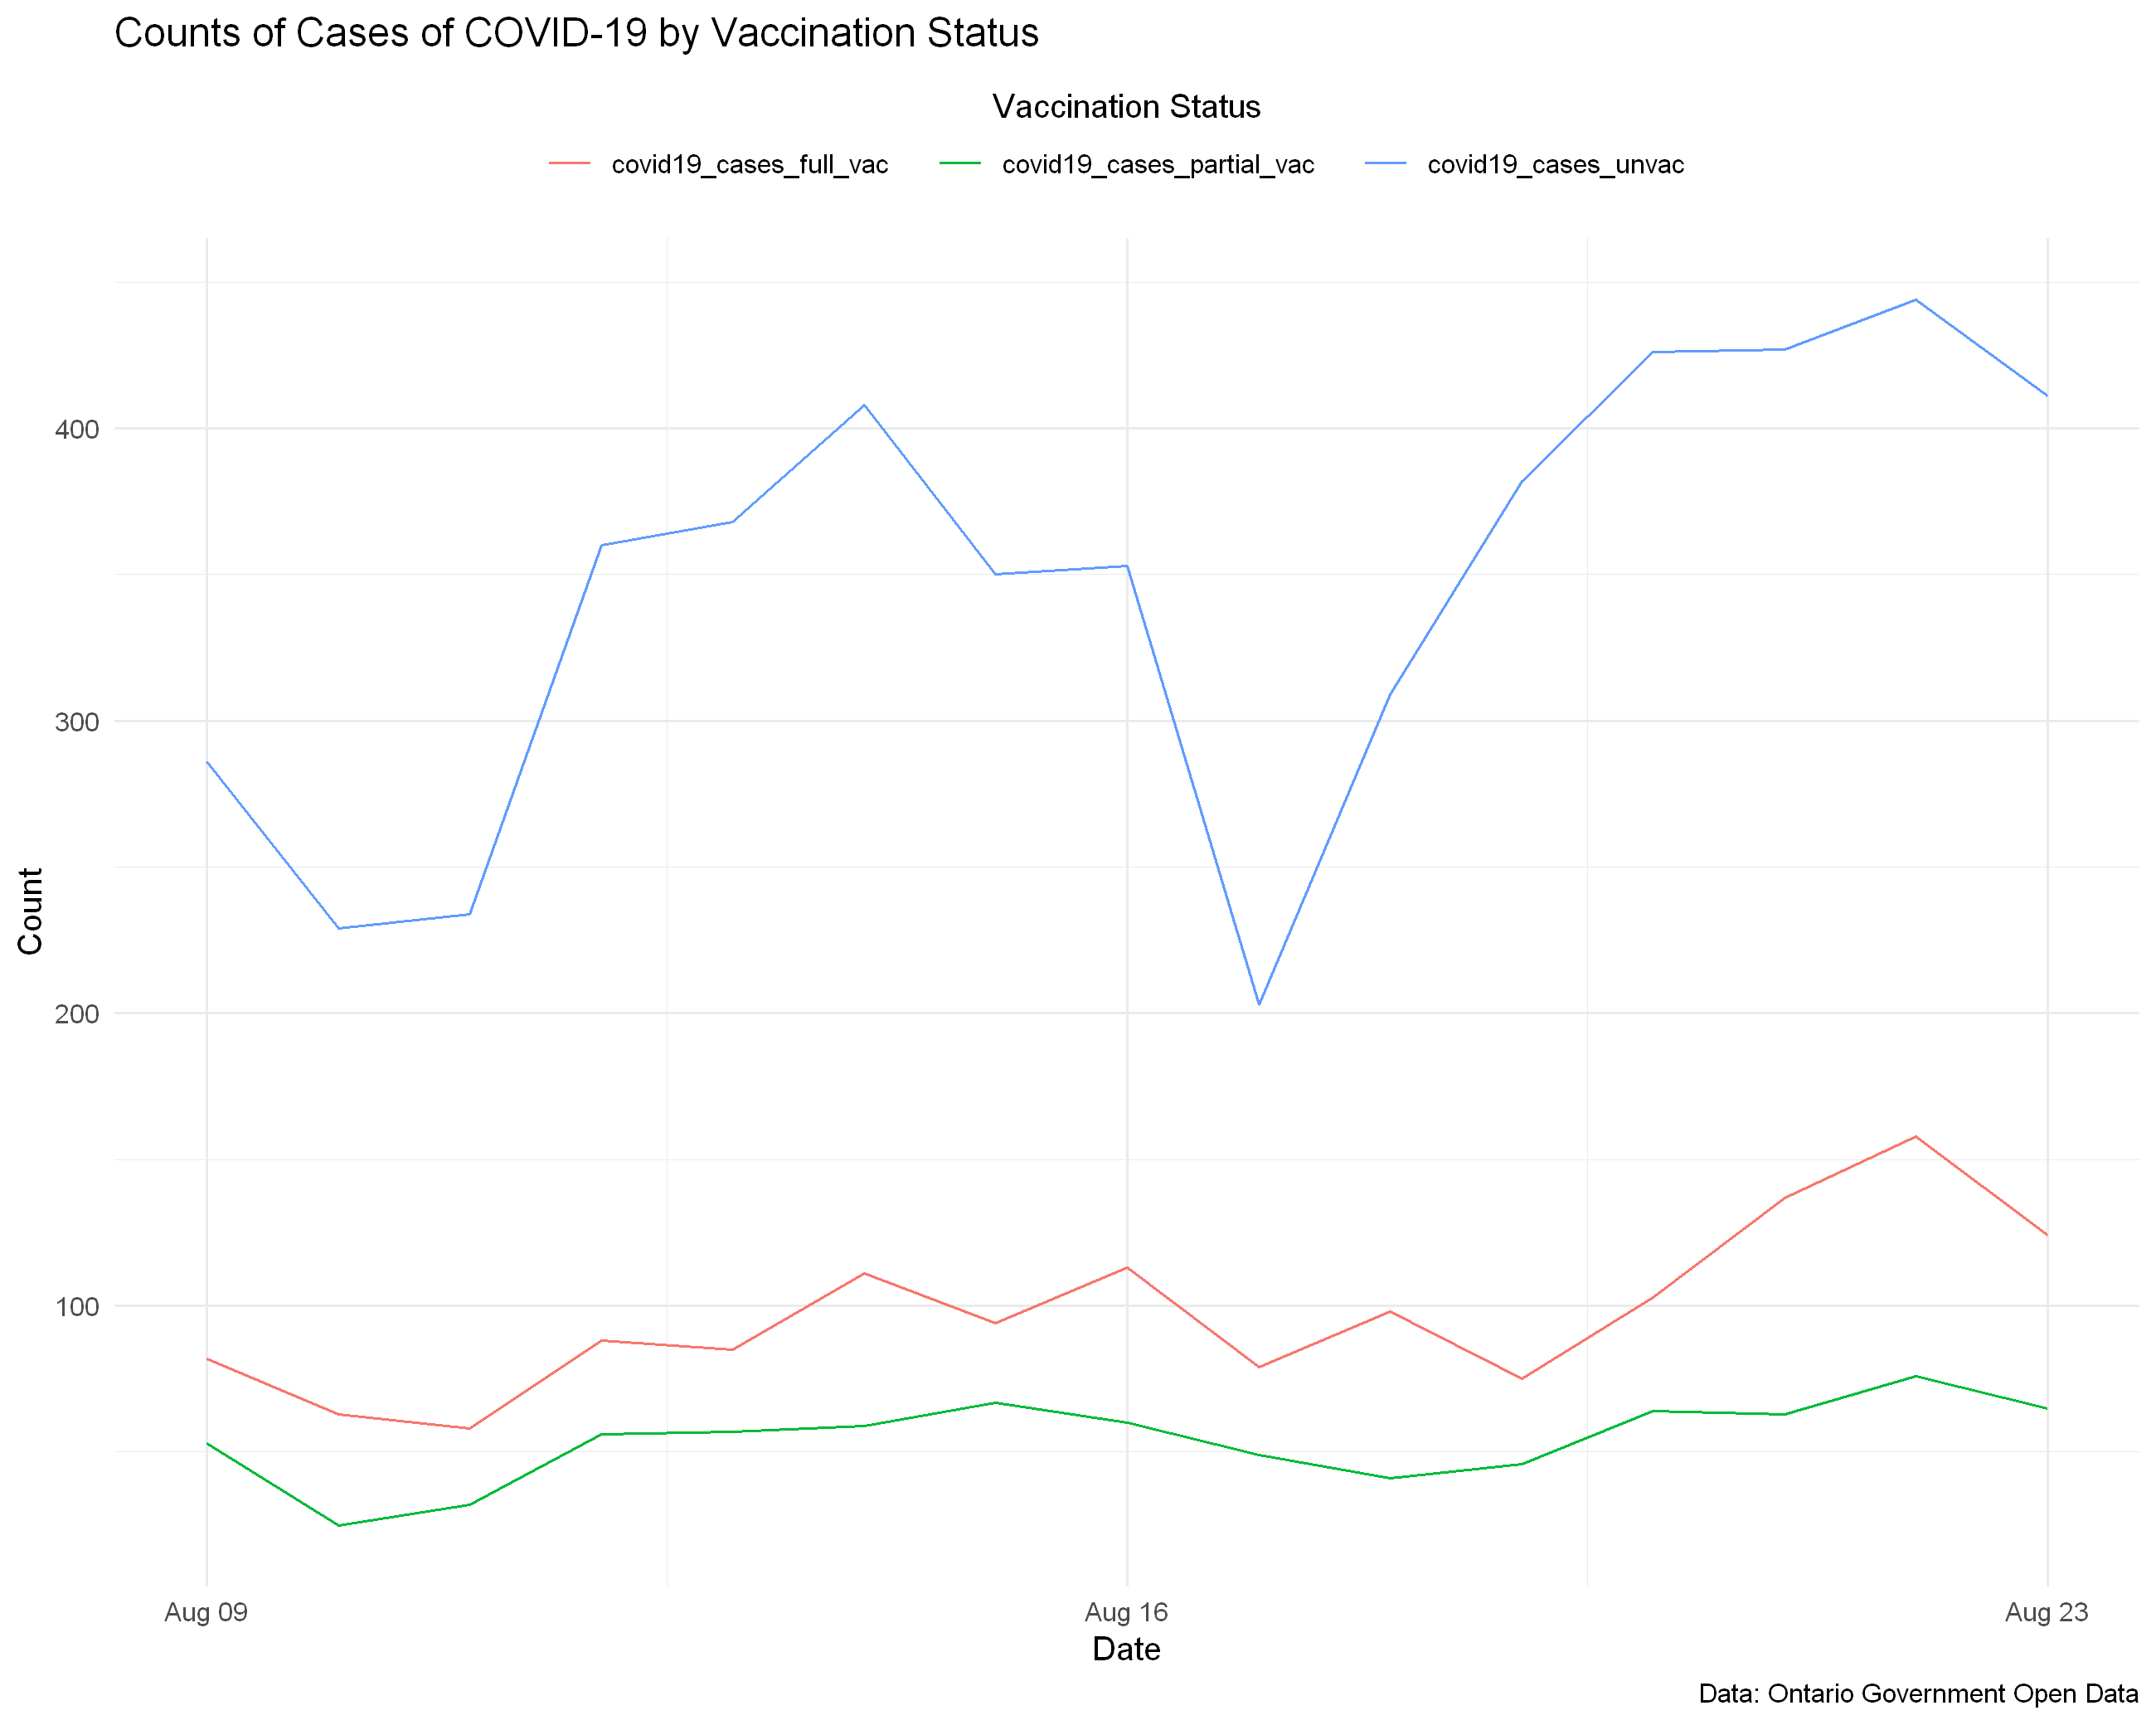

In [14]:
ggplot(cases_vac_status_tidy, aes(x = Date, y = count, color = metric)) + 
    geom_line() + 
    labs(title = 'Counts of Cases of COVID-19 by Vaccination Status', 
         caption = 'Data: Ontario Government Open Data', 
         x = 'Date', 
         y = 'Count',
         color = 'Vaccination Status') + 
    theme_minimal() + 
    theme(legend.position = 'top') +
    guides(color = guide_legend(title.position = 'top', title.hjust = 0.5))

In [15]:
cases_vac_status_normalized <- cases_vac_status %>%
    inner_join(vaccine_data_raw, by = c("Date" = "report_date")) %>%
    mutate('Fully Vaccinated' = (covid19_cases_full_vac / total_individuals_fully_vaccinated) * 100000,
           'Partially Vaccinated' = (covid19_cases_partial_vac / (total_individuals_at_least_one - total_individuals_fully_vaccinated)) * 100000,
           'Unvaccinated' = (covid19_cases_unvac / (ontario_population - total_individuals_at_least_one)) * 100000) %>%
    select(Date, 'Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated') %>%
    pivot_longer(-Date, names_to = 'metric', values_to = 'count')

head(cases_vac_status_normalized)

Date,metric,count
<date>,<chr>,<dbl>
2021-08-09,Fully Vaccinated,0.8776380
2021-08-09,Partially Vaccinated,4.3598470
2021-08-09,Unvaccinated,6.8515795
2021-08-10,Fully Vaccinated,0.6715615
2021-08-10,Partially Vaccinated,2.1040353
2021-08-10,Unvaccinated,5.4997786


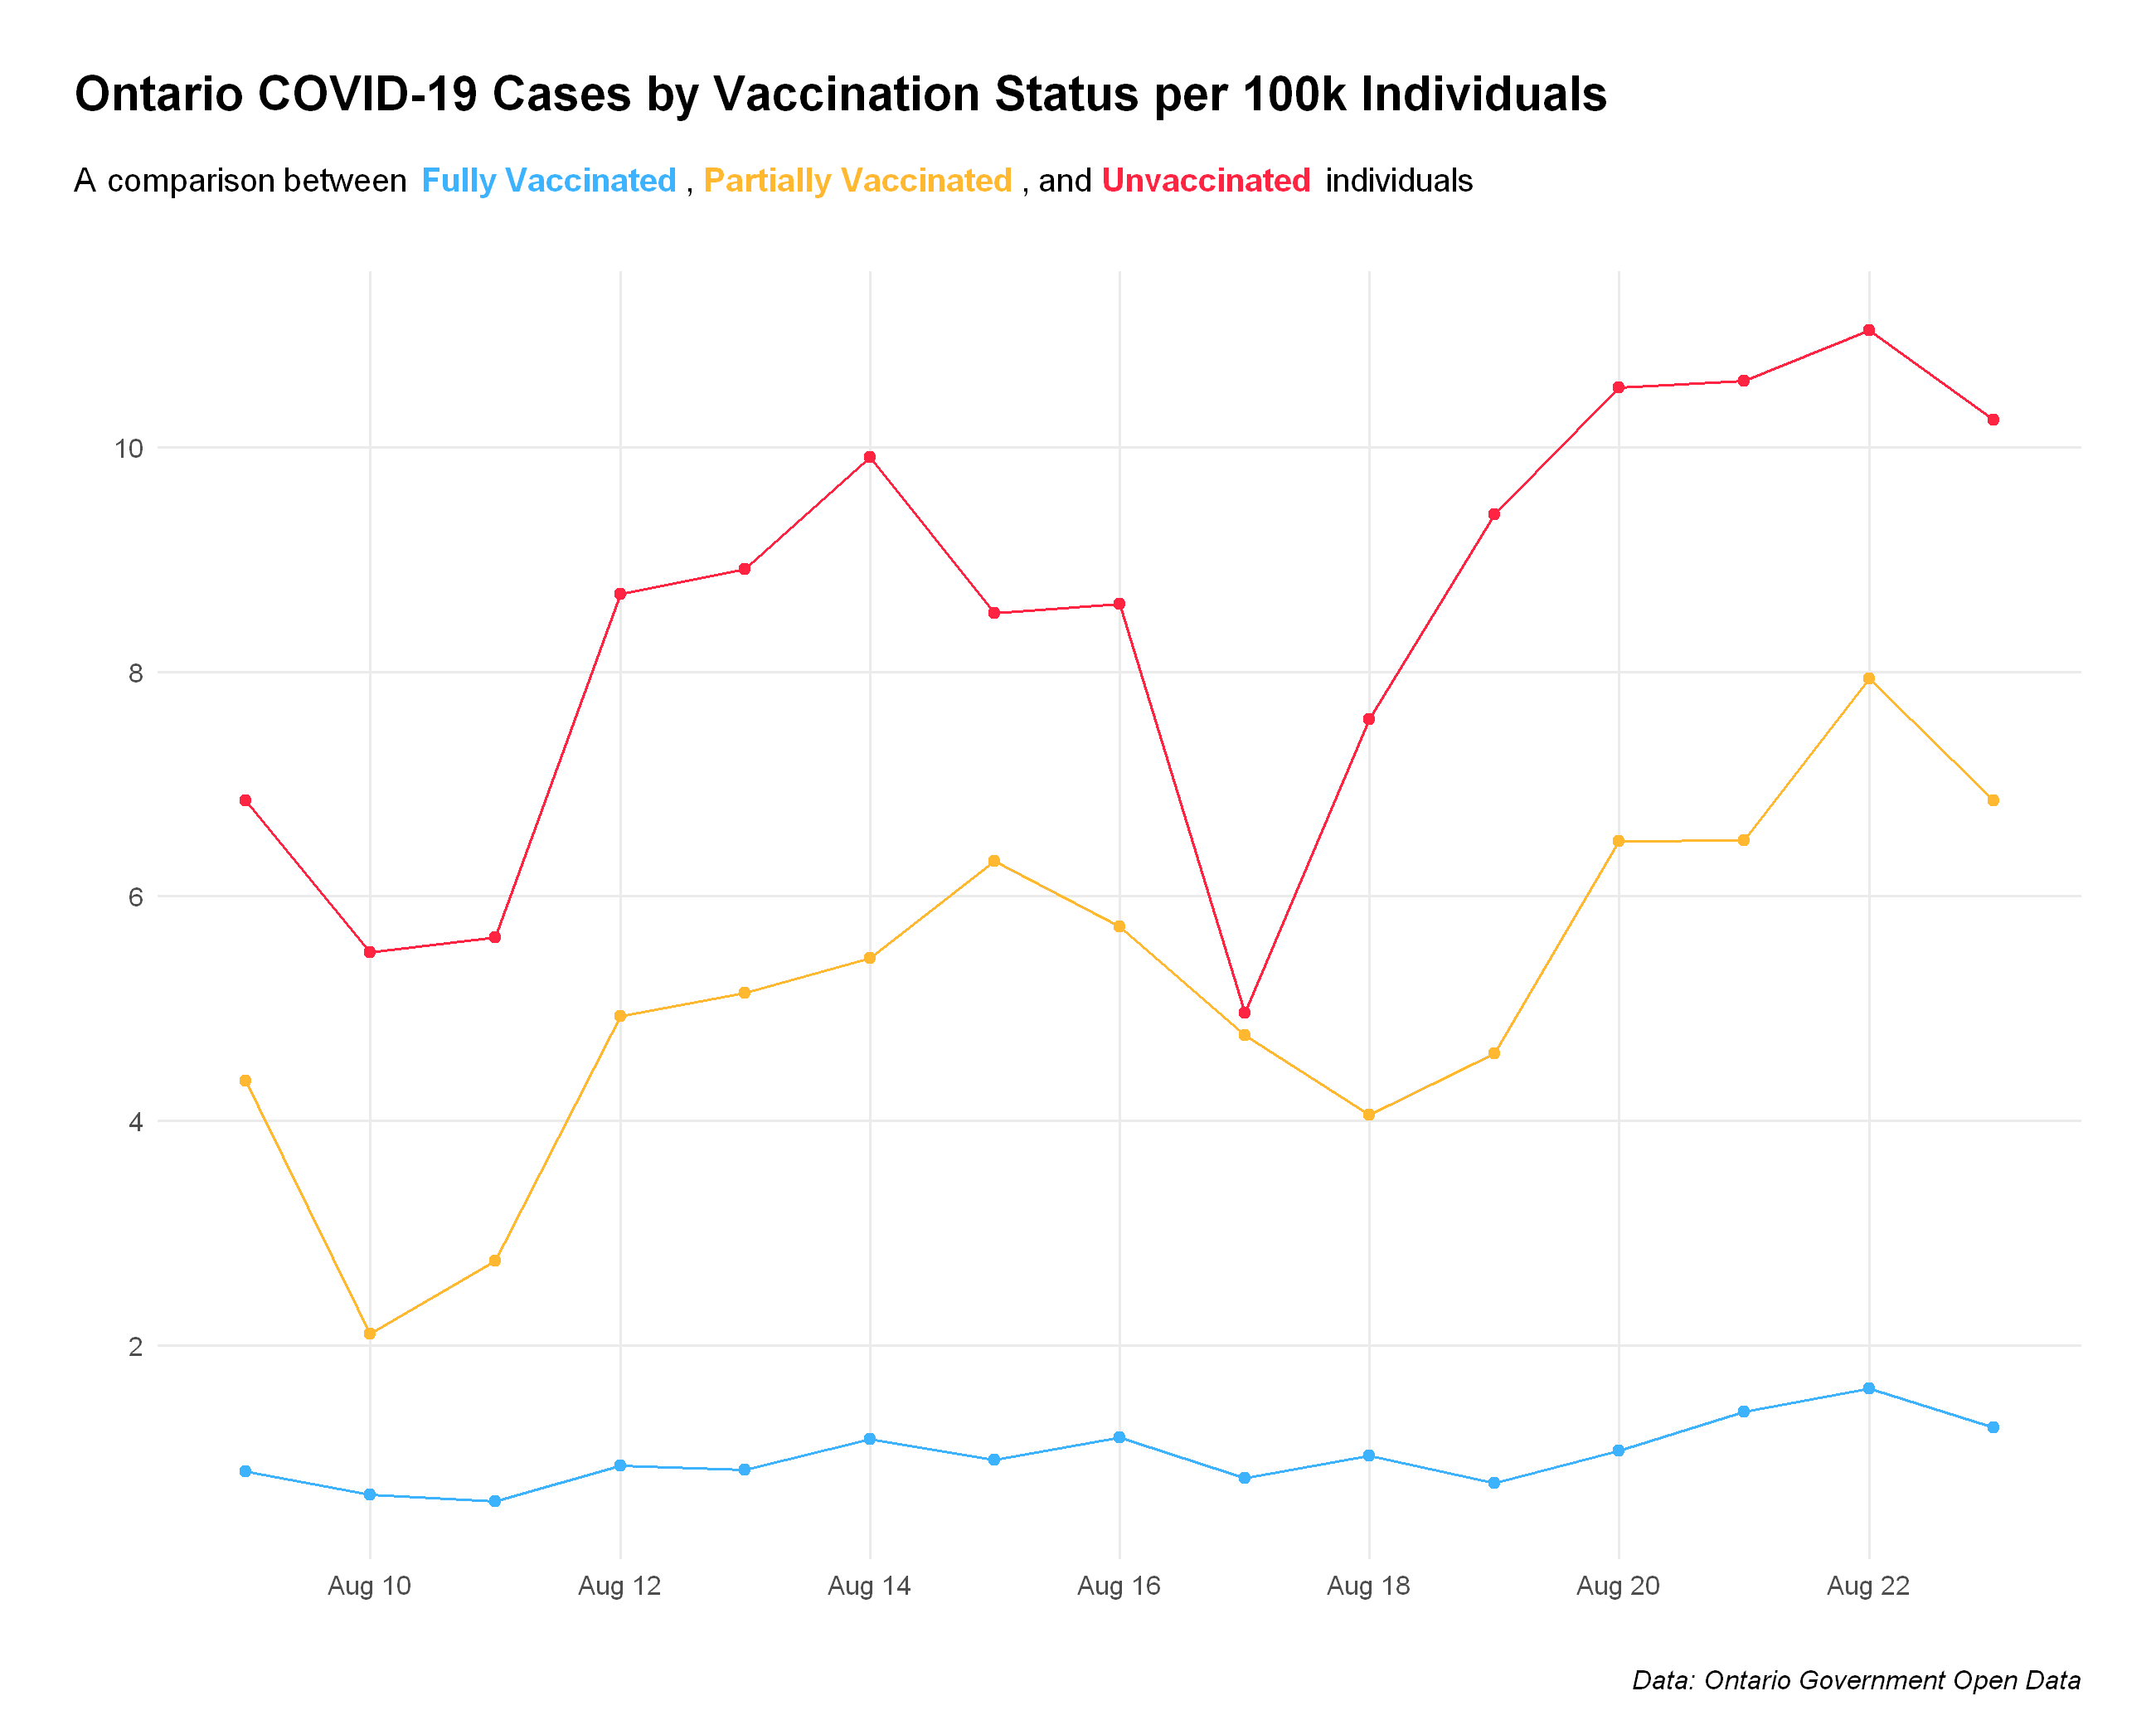

In [16]:
# colour palette: https://colorhunt.co/palette/3db2ffffeddaffb830ff2442
line_colours = c('#3DB2FF', '#FFB830', '#FF2442')

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

ggplot(cases_vac_status_normalized, aes(x = Date, y = count, color = metric)) + 
    geom_line() + 
    geom_point() + 
    labs(title = 'Ontario COVID-19 Cases by Vaccination Status per 100k Individuals',
         subtitle = 'A comparison between <b style="color:#3DB2FF;">Fully Vaccinated</b>, <b style="color:#FFB830;">Partially Vaccinated</b>, and <b style="color:#FF2442;">Unvaccinated</b> individuals',
         caption = 'Data: Ontario Government Open Data', 
         x = '', 
         y = '',
         color = 'Vaccination Status') + 
    scale_x_date(breaks = scales::pretty_breaks(10)) + 
    scale_y_continuous(breaks = scales::pretty_breaks(5)) + 
    theme_minimal() + 
    theme(plot.margin = margin(t = 25, r = 25, b = 10, l = 25), 
          legend.position = 'none', 
          plot.title.position = 'plot',
          plot.caption.position = 'plot',
          panel.grid.minor = element_blank(), 
          plot.title = element_text(face = 'bold', margin = margin(0, 0, 15, 0), size = 16),
          plot.subtitle = element_markdown(margin = margin(0, 0, 25, 0)),
          plot.caption = element_text(face = 'italic', margin = margin(10, 0, 0, 0))) +
    scale_color_manual(values = line_colours)